In [1]:
import sys
print(sys.executable) 

/Library/Frameworks/Python.framework/Versions/3.11/bin/python3.11


In [62]:
# from ucimlrepo import fetch_ucirepo 
  
# # fetch dataset 
# mushroom = fetch_ucirepo(id=73) 
  
# # data (as pandas dataframes) 
# X = mushroom.data.features 
# y = mushroom.data.targets 
  
# # metadata 
# print(mushroom.metadata) 
  
# # variable information 
# print(mushroom.variables) 


In [60]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.io import arff

# import statsmodels.formula.api as smf

In [108]:
# Import data from csv
# Dataset source: https://archive.ics.uci.edu/dataset/73/mushroom
dfm = pd.read_csv('mushroom_data.csv')
print(dfm.info())

dfm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [116]:
# Data Cleaning

#stalk-root column has some missing data, remove those rows
dfm = dfm.dropna(subset=['stalk-root'])
print("Number of rows: " + str(dfm.shape[0]))

# Every row after removing invalid stalk-roots has the same veil-type, so column is redundant
# dfv = dfm.loc[dfm['veil-type'] == 'u']
# print(dfv.shape[0]) #length equals 0
dfm = dfm.drop(['veil-type'], axis=1)

# Convert poisonous from string to integer for easier modeling (0 = edible, 1 = poisonous)
# Not sure if actually needed
if 'poisonous' in dfm:
    dfm['poisonous_n'] = dfm.poisonous.apply(lambda x: 0 if x == 'e' else 1)
    dfm = dfm.drop(['poisonous'], axis=1)

# Works, but throws a warning due to changing column type from string to int
# dfm['poisonous'] = dfm['poisonous'].replace('e', 0)
# dfm['poisonous'] = dfm['poisonous'].replace('p', 1)

dfm.info()

Number of rows: 5644
<class 'pandas.core.frame.DataFrame'>
Index: 5644 entries, 0 to 8114
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 5644 non-null   object
 1   cap-surface               5644 non-null   object
 2   cap-color                 5644 non-null   object
 3   bruises                   5644 non-null   object
 4   odor                      5644 non-null   object
 5   gill-attachment           5644 non-null   object
 6   gill-spacing              5644 non-null   object
 7   gill-size                 5644 non-null   object
 8   gill-color                5644 non-null   object
 9   stalk-shape               5644 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  5644 non-null   object
 12  stalk-surface-below-ring  5644 non-null   object
 13  stalk-color-above-ring    5644 non-null   object
 14  stalk-co

In [91]:
# Converting arff file into Pandas dataframe
# From: https://archive.ics.uci.edu/dataset/379/website+phishing
# data = arff.loadarff('PhishingData.arff')
# df = pd.DataFrame(data[0])

# # Basic Data Cleaning

# # Decode binary data as string
# df = df.select_dtypes([object])
# df = df.stack().str.decode('utf-8').astype(int).unstack()

# # Change
# print("Row count: " + str(df.shape[0]))
# print(df.info())

# df.head()

In [114]:
#Goal is to predict likelihood of a website being Phishing site
#Classifications: -1 = Phishing, 0 = Suspicious, 1 = Safe

#Testing changing to 2 class problem by removing all result 0s? Or just do 3 class regression


# df_2c = df['Result'!='0']
# print(df_2c.shape[0])



0


In [120]:
# Correlation matrix, Factorizing due to non-numerical data types
dfm_cor = dfm.apply(lambda x: x.factorize()[0]).corr()
dfm_cor

#Pairplot
# sns.pairplot(df, vars = df.columns[1:10], kind='reg', diag_kind='kde', corner=True, dropna=True)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous_n
cap-shape,1.000000,0.061266,0.006390,0.024314,0.031966,0.036518,0.012686,0.045297,0.060692,0.079150,...,0.066042,0.081847,0.094223,0.047866,0.071161,0.076913,0.103736,0.128877,0.030009,-0.012738
cap-surface,0.061266,1.000000,-0.018024,0.170464,0.231799,-0.011919,-0.079934,0.079547,0.078234,0.052305,...,0.184989,0.311082,0.294905,-0.007939,-0.098754,0.204256,0.001669,0.387680,0.328787,0.068231
cap-color,0.006390,-0.018024,1.000000,-0.037622,0.289324,0.057650,-0.058742,0.031560,0.141792,0.116227,...,-0.073184,0.019587,0.042405,-0.026314,0.158058,-0.041243,0.166598,0.099936,0.085354,-0.121709
bruises,0.024314,0.170464,-0.037622,1.000000,0.559444,0.064351,0.439183,-0.040178,-0.036862,-0.348294,...,0.643622,0.416310,0.382574,0.042863,0.007218,0.830229,0.409097,0.007056,-0.061334,-0.435562
odor,0.031966,0.231799,0.289324,0.559444,1.000000,0.151638,0.011745,0.261129,0.264612,0.028335,...,0.454124,0.502011,0.451342,-0.000648,0.158408,0.530517,0.492609,0.353483,0.280530,-0.415438
gill-attachment,0.036518,-0.011919,0.057650,0.064351,0.151638,1.000000,-0.026630,0.021353,0.095599,-0.057738,...,0.050650,0.163367,0.164673,-0.002131,0.520652,0.157052,0.150416,0.093391,0.036296,-0.071945
gill-spacing,0.012686,-0.079934,-0.058742,0.439183,0.011745,-0.026630,1.000000,-0.178484,-0.148132,0.314060,...,-0.173242,-0.342702,-0.264082,0.080026,-0.074985,0.099214,-0.175159,-0.378184,-0.228317,0.264160
gill-size,0.045297,0.079547,0.031560,-0.040178,0.261129,0.021353,-0.178484,1.000000,0.115416,0.282368,...,0.246351,0.268924,0.182452,-0.099801,0.060127,0.240390,0.093165,0.105979,0.109261,0.215289
gill-color,0.060692,0.078234,0.141792,-0.036862,0.264612,0.095599,-0.148132,0.115416,1.000000,0.088911,...,0.093794,0.197613,0.202523,0.063676,0.167014,0.065731,0.221718,0.257183,0.212575,-0.129357
stalk-shape,0.079150,0.052305,0.116227,-0.348294,0.028335,-0.057738,0.314060,0.282368,0.088911,1.000000,...,-0.563249,-0.330838,-0.300655,-0.038458,-0.162582,-0.426768,-0.448541,0.031050,-0.000168,0.592446


<Axes: >

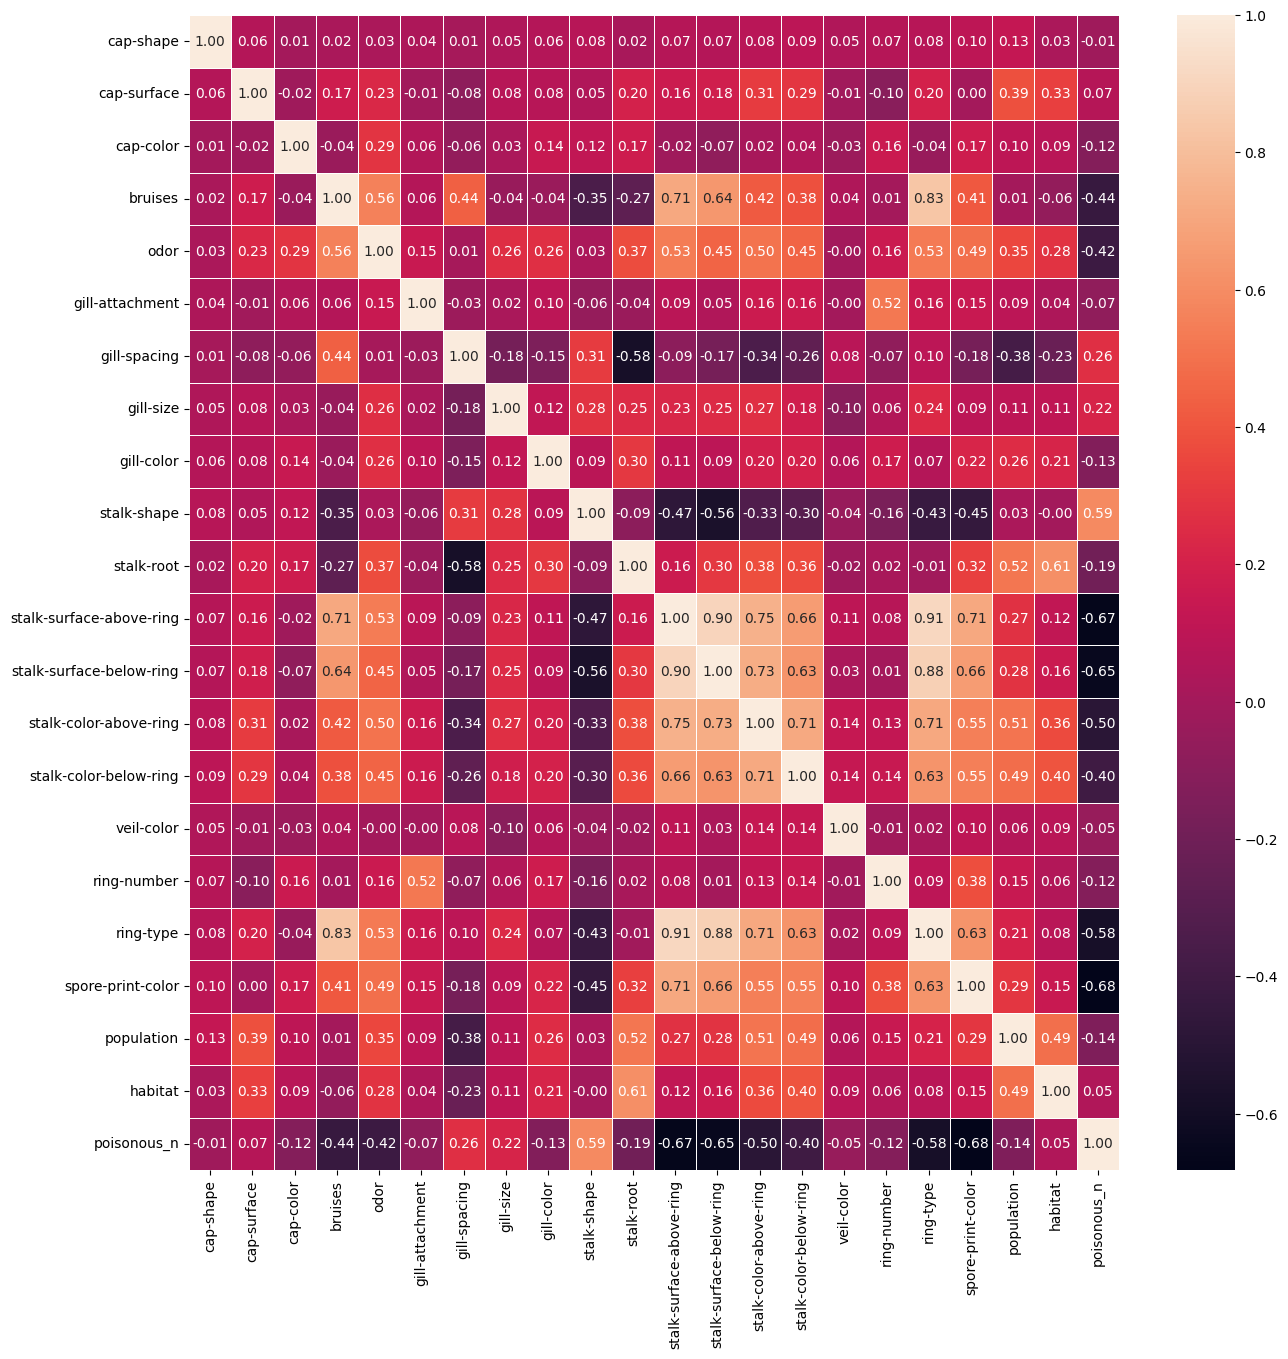

In [119]:
#Heatmap
plt.figure(figsize=(15,15))
sns.heatmap(dfm_cor, linewidths=.5, annot=True, fmt=".2f")

# Not too many correlations, notable ones:
# The stalk-related columns are correlated, also correlated with ring-type
# Possible correlation between ring-type and bruises as well

In [ ]:
# Testing out different models

# Linear Regression
# model = smf.ols(formula='price ~ sqft_living', data=df).fit()
# print(model.summary())

# SVC
model_svc = SVC()